# **Working with dates**

In [1]:
import pandas as pd

In [3]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [4]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [6]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [11]:
# Naive methodology to export date as strings
ufo.Time.str.slice(-5, -3).astype(int)  # Gets the hour of the date

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int64

In [ ]:
ufo['Time'] = pd.to_datetime(ufo['Time']|)

In [14]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [16]:
ufo.dtypes  # the Time dtypa changes to datetime

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [17]:
ufo['Time'].dt.hour

0        22
1        20
2        14
3        13
4        19
         ..
18236    23
18237    23
18238    23
18239    23
18240    23
Name: Time, Length: 18241, dtype: int32

In [19]:
ufo['Time'].dt.weekday

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int32

In [21]:
ufo['Time'].dt.day_of_week

0        6
1        0
2        6
3        0
4        1
        ..
18236    6
18237    6
18238    6
18239    6
18240    6
Name: Time, Length: 18241, dtype: int32

In [22]:
ufo['Time'].dt.day_of_year

0        152
1        181
2         46
3        152
4        108
        ... 
18236    366
18237    366
18238    366
18239    366
18240    366
Name: Time, Length: 18241, dtype: int32

* source: https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html

In [24]:
pd.to_datetime('1/1/1999')  # timestamp

Timestamp('1999-01-01 00:00:00')

In [29]:
ts = pd.to_datetime('1/1/1999')

In [30]:
ufo.loc[ufo['Time'] >= ts]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [31]:
ufo['Time'].max()

Timestamp('2000-12-31 23:59:00')

In [32]:
ufo['Time'].min()

Timestamp('1930-06-01 22:00:00')

In [34]:
ufo['Time'].max() - ufo['Time'].min()  # returns a timedelta type

Timedelta('25781 days 01:59:00')

In [37]:
(ufo['Time'].max() - ufo['Time'].min()).days

25781

In [39]:
ufo['Year'] = ufo['Time'].dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


<Axes: xlabel='Year'>

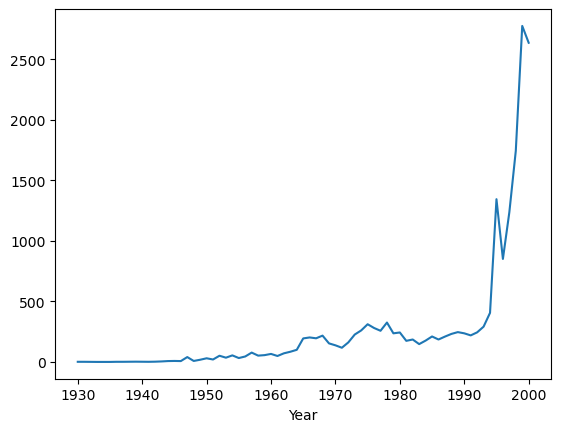

In [42]:
ufo['Year'].value_counts().sort_index().plot()